# Importanto base de dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# Tradução

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {'total_bill' : 'valor_da_conta',
            'tip' : 'gorjeta',
            'dessert' : 'sobremesa',
            'day' : 'dia_da_semana',
            'time' : 'hora_do_dia',
            'size' : 'total_de_pessoas'}

In [ ]:
gorjetas = dados.rename(columns = renomear)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


## Traduzindo o conteúdo do nosso dataframe

Começaremos com sobremesa utilizando gorjetas.sobremesa, o qual é um tipo categórico de "sim" ou "não". Para visualizarmos todos os tipos que aparecem para este campo, inserimos o comando .unique() à sentença.

In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

Copiaremos este mesmo conteúdo e criaremos uma lista do tipo sim_nao sendo igual a `'No', 'Yes'`

In [ ]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

Agora, precisaremos mapear todos os gorjetas.sobremesa para "Sim" e "Não" utilizando o comando `map()` recebendo o valor sim_nao.

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


Agora faremos o mesmo para os dias da semana

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


E por último a hora do dia

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# Importando o Seaborn

O Seaborn que importaremos é uma API feita com base no MatPlotlib para plotagem de dados, geração de visualizações e gráficos estatísticos, além de ser em Python.

In [ ]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

## Análise 1 - Valor da conta e gorjeta

Chamaremos o Seaborn por sns e geraremos este primeiro gráfico com `scatterplot()`, o qual receberá três parâmetros: x referente ao valor do eixo `'valor_da_conta'`, y para `'gorjeta'` e a base de dados data-gorjetas que estamos utilizando.

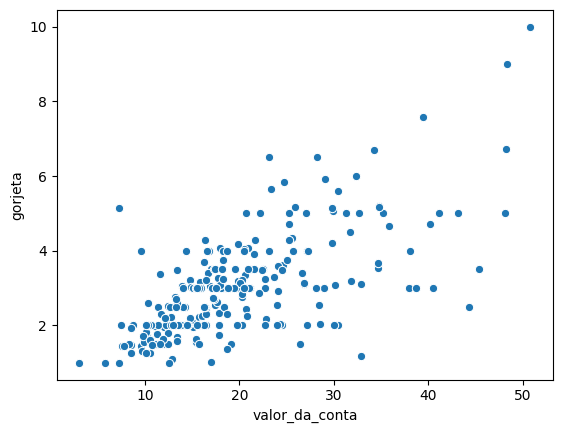

In [ ]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

**há uma progressão linear que indica o aumento do valor da gorjeta conforme o valor da conta é maior para cada mesa.**

Porém, existe uma questão interessante para nos atentarmos; é importante conhecermos bem nosso banco e sabermos que não existe nenhum valor nulo. Para sabermos quantos dados temos em nossa base, adicionaremos o comando gorjetas.`shape[0]`. Como retorno, o sistema nos apresentará o valor de 244 registros.

In [ ]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
porcentagem         244
dtype: int64

## Criando o campo porcentagem

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


já temos o valor da porcentagem, queremos visualizar um gráfico estatístico com `valor_da_conta` sendo o eixo x e a porcentagem sendo o eixo y para vermos se realmente os valores são proporcionais.

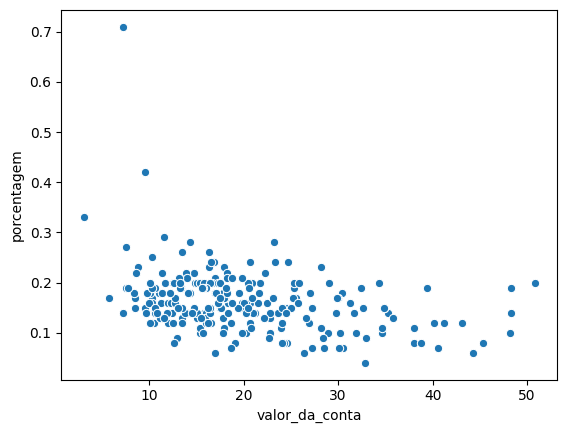

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

 visualmente parece que o valor da conta não é proporcional ao valor da gorjeta, e sim que diminui. Ou seja, nas contas mais altas, os valores das gorjetas foram maiores do que as mais baixas, porém não são proporcionais, apesar das impressões do primeiro gráfico feito anteriormente.

## Criando gráfico de linhas

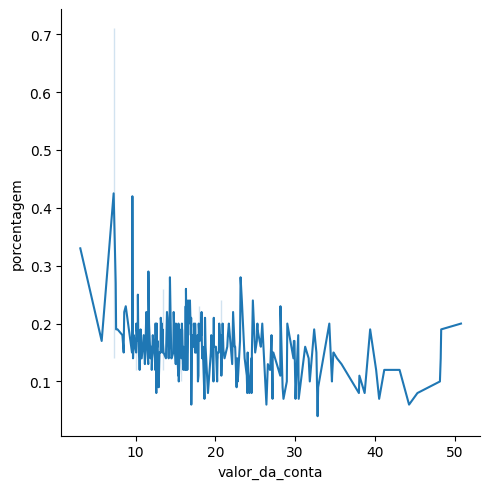

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

Para visualizarmos a progressão que estamos tendo, escreveremos apenas o comando `sns.lmplot()` recebendo os mesmos eixos, sem necessidade de armazenar em uma variável própria.


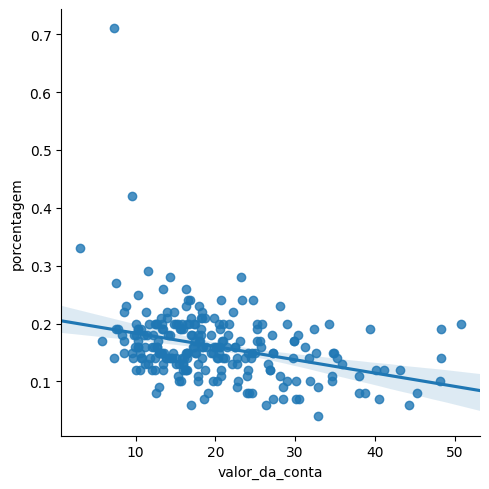

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Salvando uma imagem

Para salvar uma gráfico e fazer download da imagem no formato png por exemplo, atribuímos a uma variável a função `get_figure()`.

Por exemplo: `imagem = primeiro_plot.get_figure()`

Em seguida, para salvar a imagem usamos o comando `imagem.savefig('imagem.png')`. Após salvar a imagem, podemos dar um refresh nos arquivos e visualizar a imagem disponível para download.



#Análise 2 - Sobremesa

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


Assim poderemos visualizar quantos pedidos atendem esta chamada. Dos 244 registros, há 93 que pediram a sobremesa na linha de "count". Na linha seguinte, veremos "mean" que corresponde à média de dos valores de cada campo. Em seguida, temos o desvio padrão em "std", o valor mínimo em "min" e o máximo em "max".

In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


Com isso, poderemos ver que 151 registros pediram o item, e que a média do valor da conta e da gorjeta são menores em relação à descrição anterior, mesmo que bastante próximas. Também compararemos as linhas de valores máximos e mínimos.

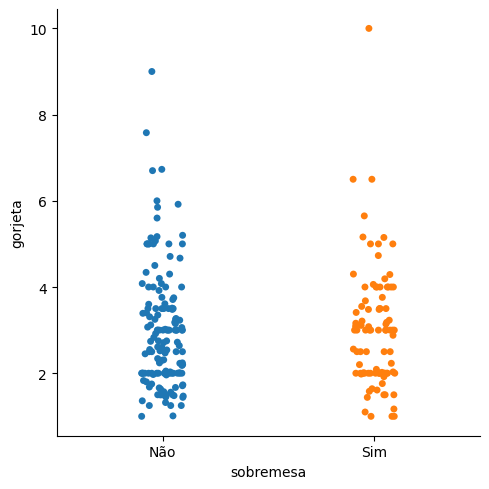

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', hue='sobremesa',data=gorjetas)

Porém, ainda não conseguiremos identificar e afirmar que a sobremesa influencia diretamente no valor da gorjeta; é possível ver que há diferenças, mas a resposta não é exata.

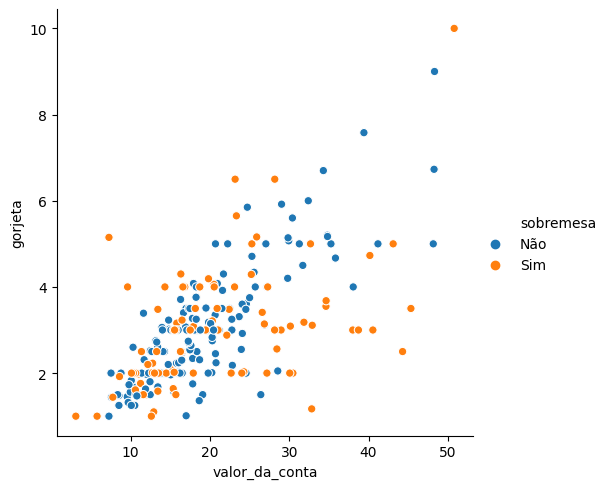

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

Analisando este gráfico, poderemos visualizar que os pontos de "não" possuem uma distribuição mais linear do que os de "sim", os quais aparentam mais espaçamento sem grande linearidade.

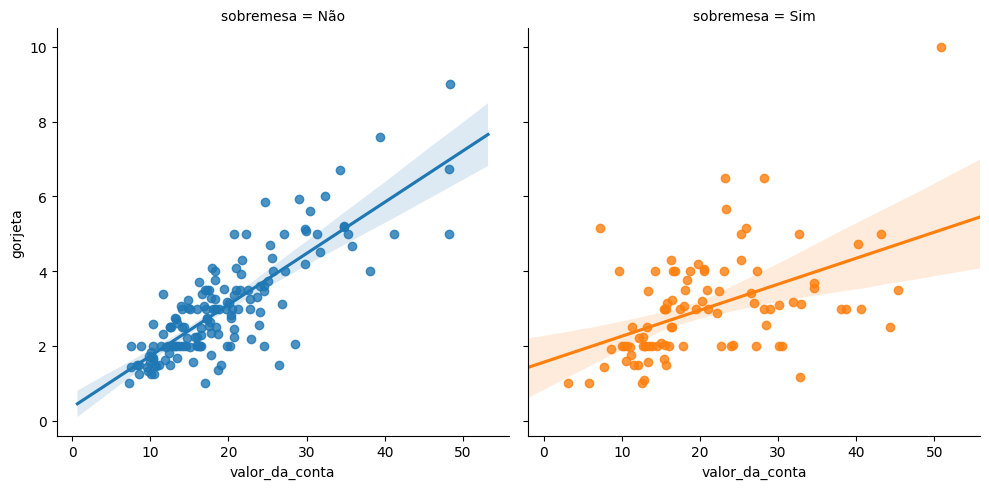

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

Com isso, poderemos ver que existe uma diferença de fato; visualmente, identificaremos que aqueles que pediram sobremesa possuem a distribuição diferente em comparação aos que não pediram.

Nossa conclusão será que, de fato, existe uma diferença no valor da gorjeta de acordo com o pedido ou não de sobremesa, mas que é bastante sutil. Para termos certeza da influência de um sobre o outro, faremos um cálculo estatístico a seguir.

# Análise 3 - Dia da semana

Queremos verificar quais são os dias da semana registrados neste campo através de `gorjetas.dia_da_semana.unique()`.

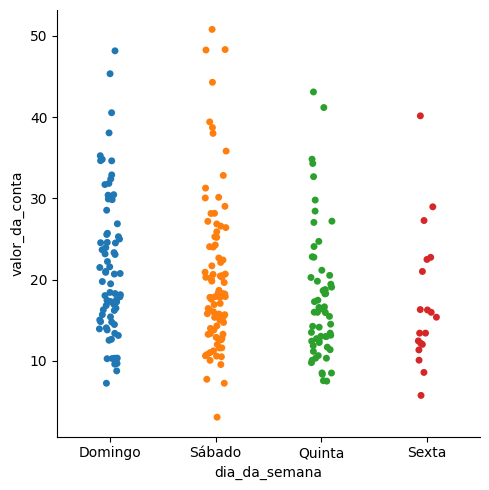

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

Visualmente, quinta e sextas são os dias que as pessoas menos gastam no restaurante, enquanto sábado e domingo apresentam os maiores valores da conta.

Chamaremos sns para `relplot()` que receberá `x='valor_da_conta'`, `y='gorjeta'`, `hue='dia_da_semana'`. Para termos esta separação, passamos a já conhecida propriedade `col='dia_da_semana'`, finalizando com nosso DataFrame.

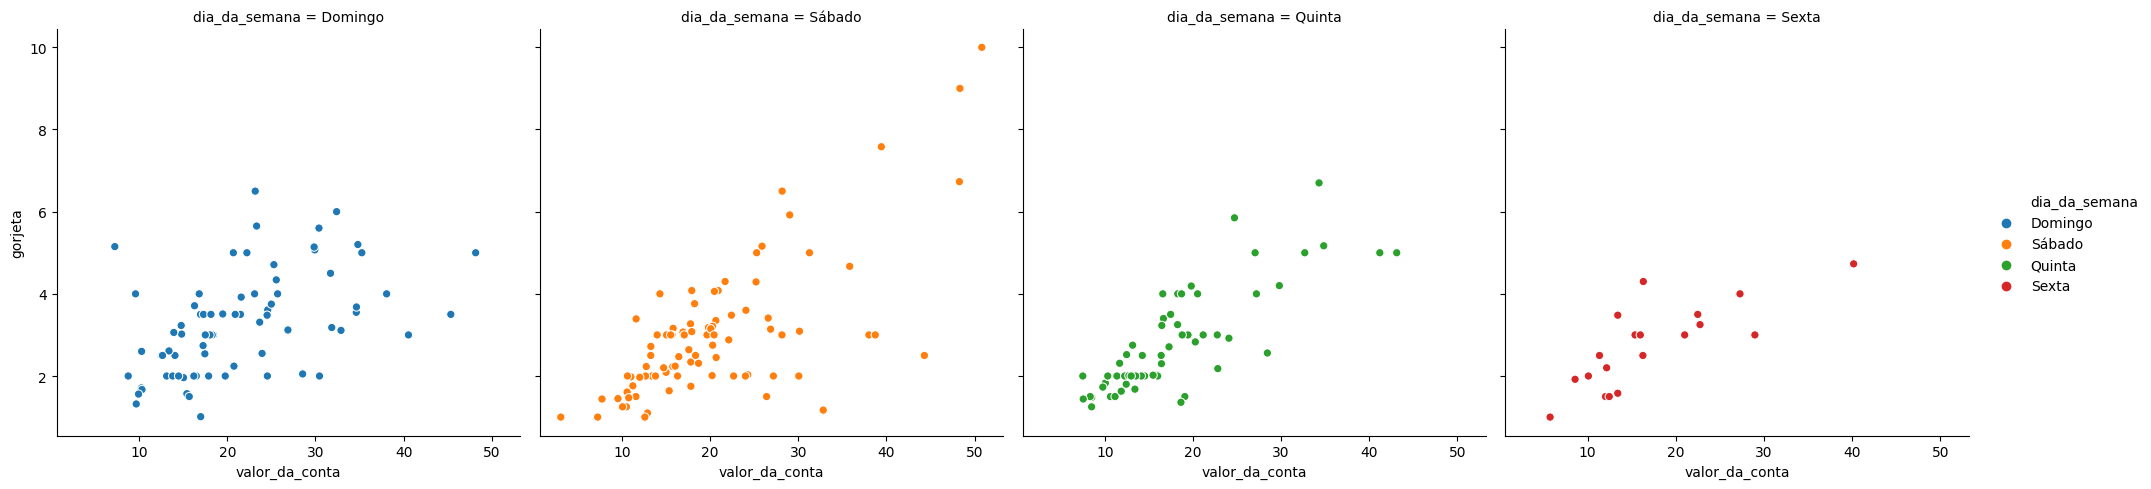

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

Em seguida, traçaremos uma linha para cada dia da semana relacionados à porcentagem. Copiaremos e colaremos a última sentença e apenas substituiremos `relplot()` por `lmplot()`.

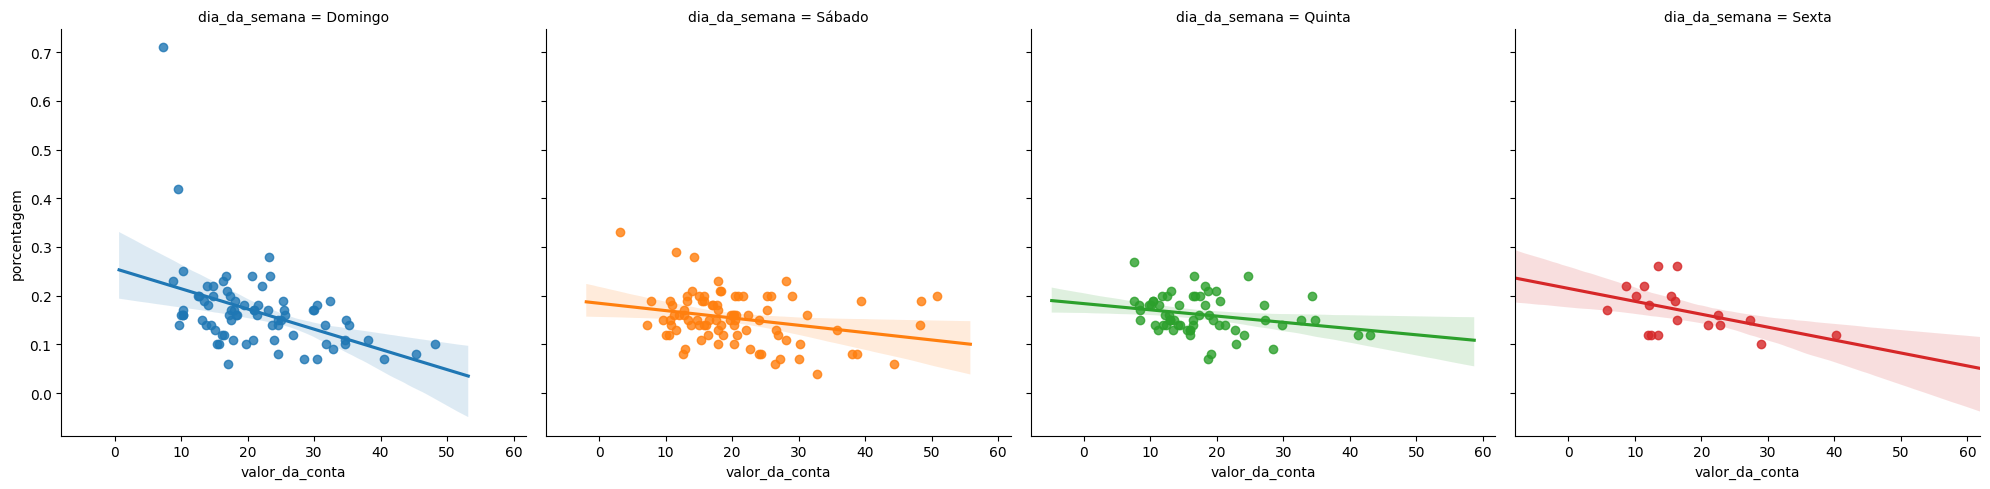

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

Assim, perceberemos melhor as diferenças entre os dias, constatando algumas observações; todas as porcentagens caem conforme o valor da conta sobe, e percebemos maiores distinções entre o domingo e o sábado.

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


Agora, faremos a média geral dos valores para quinta, sexta, sábado e domingo. Pegaremos primeiro a média de todos os dias com `gorjetas.groupby()`, recebendo a especificação de 'dia_da_semana' entre colchetes. Em seguida, aplicamos a média `mean()`. Logo após o `mean()` colocaremos entre [ [ ] ] os campos dos quais queremos visualizar.

In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

<ipython-input-129-a13207cc9443>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


Estamos olhando somente a média dos valores, sem levar em consideração o número de clientes em cada dia. Para saber a frequência desses dias, inserimos `gorjetas.dia_da_semana` com value_counts().

In [ ]:
gorjetas.dia_da_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

Compararemos com a tabela de médias e veremos que a gorjeta é maior para o domingo, o segundo dia mais frequentado. Enquanto o sábado que é o dia mais cheio não possui a maior média de gorjeta.

Falta-nos analisar a hora do dia em relação ao valor da conta e percentual de gorjeta. Neste campo, temos dois períodos diferentes a serem analisados: Almoço e Jantar, visíveis por `gorjetas.hora_do_dia.unique()`.

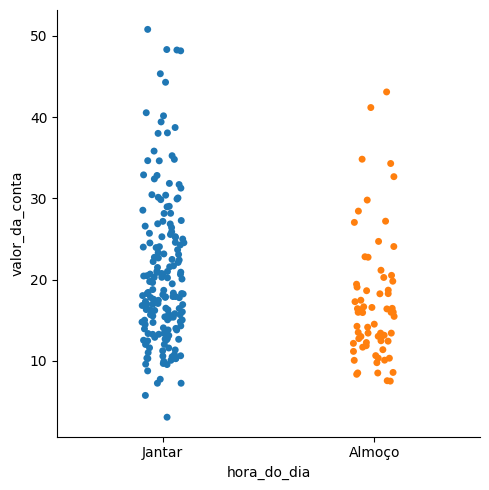

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

Perceberemos que existem alguns pontos com quantias muito parecidas, e poderemos aplicar um parâmetro que nos permitirá visualizar melhor todos os pontos separadamente. Copiaremos a última sentença de código e colaremos na célula seguinte, passando um quarto parâmetro `kind` sendo igual a `'swarm'`.

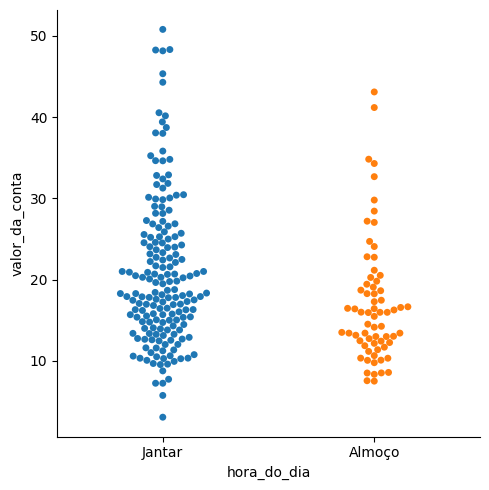

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)